<a href="https://colab.research.google.com/github/cg1011/Load-MNIST-dataset/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *LOAD MNIST DATASET*

In [1]:
# import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("/content/train.csv")

In [3]:
# read first five rows
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
# save the labels into variables l
l = df["label"]

In [5]:
# drop the label feature and store the data into d
d = df.drop(labels="label",axis=1)

In [6]:
# dimensions of d
d.shape


(42000, 784)

In [7]:
# dim of l 
l.shape

(42000,)

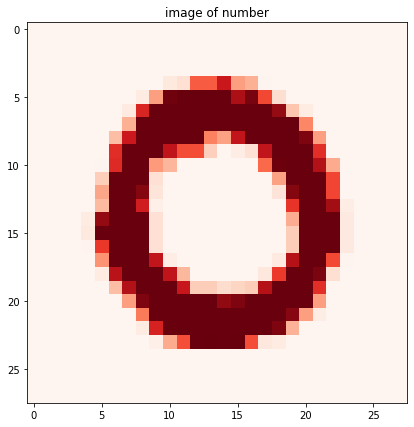

Original Number: 0


In [8]:
# display or plot the number
plt.figure(figsize=(7,7))
plt.title("image of number")
idx = 1

grid_data = d.iloc[idx].to_numpy().reshape(28,28)
plt.imshow(grid_data,interpolation="none",cmap="Reds")
plt.show()

print("Original Number:",l[idx])

# 2D visualization using PCA

In [9]:
# data preprocessing  : standardizing the data
from sklearn.preprocessing import StandardScaler
std_data = StandardScaler().fit_transform(d)
print(std_data.shape)

(42000, 784)


In [10]:
# Find the co-variance of matrix of A : A^T*A
# matrix multiplication using numpy
covar_matrix = np.matmul(std_data.T,std_data)

print("the shape of variance matrix : ",covar_matrix.shape)

the shape of variance matrix :  (784, 784)


In [11]:
# Finding the top two eigen values and eigen vector
# for projecting onto a 2D
from scipy.linalg import eigh

# this code will generates top two (782,783) eigen values
values,vectors = eigh(covar_matrix,eigvals = (782,783))
print("Shape of eigen vectors:",vectors.shape)

# converting the eigen vectors into (2,d) shape for easyness of further computation
vectors = vectors.T
print("Updated shape of eigen vectors :",vectors.shape)

Shape of eigen vectors: (784, 2)
Updated shape of eigen vectors : (2, 784)


In [12]:
# projecting the original data sample on the plane 
# formed by two principal eigen vectors by vector-vector multiplication
new_coordinates = np.matmul(vectors,std_data.T)
print("resultants new data points shape :",vectors.shape,"X",std_data.T.shape,"=",new_coordinates.shape)


resultants new data points shape : (2, 784) X (784, 42000) = (2, 42000)


In [13]:
# appendind labels to 2nd projected data
new_coordinates = np.vstack((new_coordinates,l)).T
# creating new dataframe for plotting labelled points
dataframe = pd.DataFrame(data=new_coordinates,columns=("1st Principal","2nd Principal","labels"))
print(dataframe.head())

   1st Principal  2nd Principal  labels
0      -5.226445      -5.140478     1.0
1       6.032996      19.292332     0.0
2      -1.705813      -7.644503     1.0
3       5.836139      -0.474207     4.0
4       6.024818      26.559574     0.0


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 504x504 with 0 Axes>

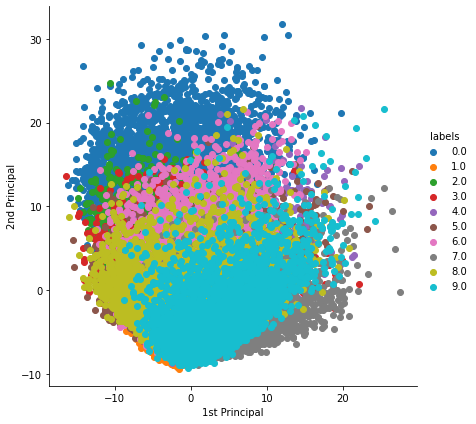

In [14]:
# ploting the 2nd data point by seaborn
import seaborn as sns
plt.figure(figsize=(7,7))
sns.FacetGrid(dataframe,hue = "labels",size=6).map(plt.scatter,"1st Principal","2nd Principal").add_legend()
plt.show()

# PCA using Scikit-learn 

In [15]:
# initializing the pca
from sklearn import decomposition
pca = decomposition.PCA()

In [16]:
pca.n_components = 2
pca_data = pca.fit_transform(std_data)
# pca_reduced will contain the 2D projected of simple data
print("shape of reduced pca:",pca_data.shape)

shape of reduced pca: (42000, 2)


In [17]:
# appending the labels to 2D data point 
pca_data = np.vstack((pca_data.T,l)).T
print(pca_data.shape)

(42000, 3)


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


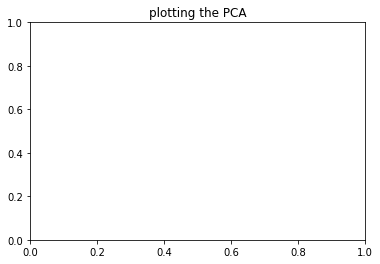

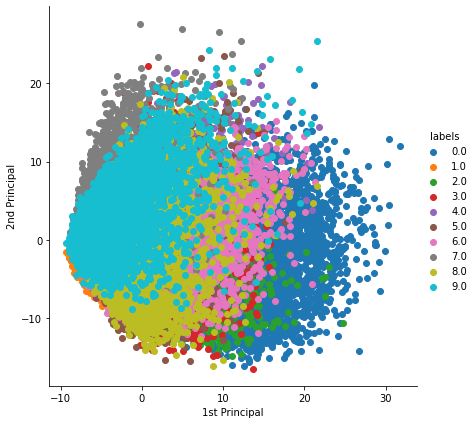

In [20]:
# creating a new data frame which help us in plotting the result data
pca_df = pd.DataFrame(data=pca_data,columns=("1st Principal","2nd Principal","labels"))
plt.title("plotting the PCA")
sns.FacetGrid(pca_df,hue="labels",size=6).map(plt.scatter,"1st Principal","2nd Principal").add_legend()
plt.show()